<a href="https://colab.research.google.com/github/ramesh2212/Avacado-ML-Multiple-regression-Supervised-Learning/blob/main/avacado_data_set_for_ml_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline

# Load the dataset

In [ ]:
df = pd.read_csv('/content/Avocado.csv')


In [ ]:
df.rename(columns={'Unnamed: 0':'index'},inplace=True)

In [ ]:
df.head()

,index,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
# set index as ID column
df= df.set_index('index')

# checking shap,info ,description of data set

In [ ]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
index,,,,,,,,,,,,,
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
print('the shape of given data set is :',df.shape)

the shape of given data set is : (18249, 13)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [ ]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
df.describe(include='all')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,2015-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Midsouth
freq,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


# checkling missing value in data set

In [ ]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# finding unique value and value counts in data set

In [ ]:
# using for loop find unique value

for i in df.columns:
  print ('the unique value in given data set is ---> {} ({}) \n{}'  .format(i, len(df[i].unique()), df[i].unique()))
  print ('==========================================================')

the unique value in given data set is ---> Date (169) 
['2015-12-27' '2015-12-20' '2015-12-13' '2015-12-06' '2015-11-29'
 '2015-11-22' '2015-11-15' '2015-11-08' '2015-11-01' '2015-10-25'
 '2015-10-18' '2015-10-11' '2015-10-04' '2015-09-27' '2015-09-20'
 '2015-09-13' '2015-09-06' '2015-08-30' '2015-08-23' '2015-08-16'
 '2015-08-09' '2015-08-02' '2015-07-26' '2015-07-19' '2015-07-12'
 '2015-07-05' '2015-06-28' '2015-06-21' '2015-06-14' '2015-06-07'
 '2015-05-31' '2015-05-24' '2015-05-17' '2015-05-10' '2015-05-03'
 '2015-04-26' '2015-04-19' '2015-04-12' '2015-04-05' '2015-03-29'
 '2015-03-22' '2015-03-15' '2015-03-08' '2015-03-01' '2015-02-22'
 '2015-02-15' '2015-02-08' '2015-02-01' '2015-01-25' '2015-01-18'
 '2015-01-11' '2015-01-04' '2016-12-25' '2016-12-18' '2016-12-11'
 '2016-12-04' '2016-11-27' '2016-11-20' '2016-11-13' '2016-11-06'
 '2016-10-30' '2016-10-23' '2016-10-16' '2016-10-09' '2016-10-02'
 '2016-09-25' '2016-09-18' '2016-09-11' '2016-09-04' '2016-08-28'
 '2016-08-21' '2016-0

In [ ]:
# using for loop find value counts

for i in df.columns:
  print ('the value counts in given data set is ---> {} ({})\n{} '.format(i, len(df[i].unique()), df[i].value_counts()))
  print ('==========================================================')


the value counts in given data set is ---> Date (169)
2015-11-01    108
2017-07-30    108
2017-09-03    108
2015-01-04    108
2017-08-20    108
             ... 
2016-03-20    108
2015-12-13    108
2015-12-06    107
2017-06-18    107
2017-06-25    107
Name: Date, Length: 169, dtype: int64 
the value counts in given data set is ---> AveragePrice (259)
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.05      1
3.03      1
2.91      1
0.48      1
2.96      1
Name: AveragePrice, Length: 259, dtype: int64 
the value counts in given data set is ---> Total Volume (18237)
3713.49      2
3529.44      2
2038.99      2
569349.05    2
4103.97      2
            ..
238229.99    1
344613.01    1
322940.72    1
2943.85      1
10187.56     1
Name: Total Volume, Length: 18237, dtype: int64 
the value counts in given data set is ---> 4046 (17702)
0.00          242
3.00           10
1.24            8
1.00            8
4.00            8
             ... 
15880.80        1
659.34  

# for univerient analysis


In [ ]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
index,,,,,,,,,,,,,
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df.select_dtypes(include=['object']).columns

Index(['Date', 'type', 'region'], dtype='object')

(array([9126.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        9123.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

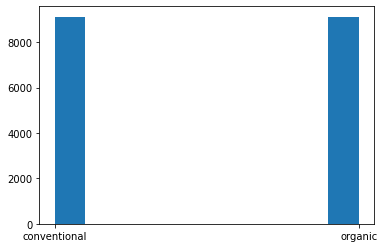

In [ ]:
plt.hist(df['type'])

(array([2028., 1690., 1690., 2028., 1690., 1690., 2028., 1690., 1690.,
        2025.]),
 array([ 0. ,  5.3, 10.6, 15.9, 21.2, 26.5, 31.8, 37.1, 42.4, 47.7, 53. ]),
 <a list of 10 Patch objects>)

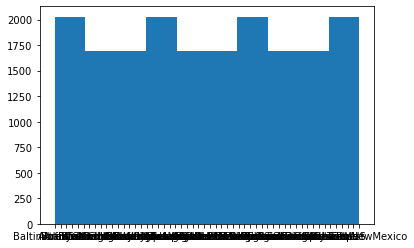

In [ ]:
plt.hist(df['region'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


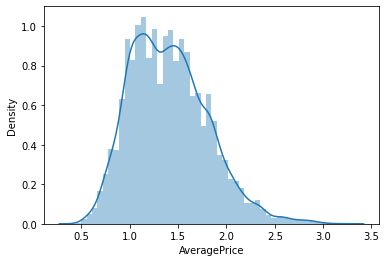

In [ ]:
sns.distplot(df['AveragePrice'])


In [ ]:
# hypothesis testing for checking normality
# null hypothesis = it follow normal distribution
# alternative hypothesis= it does not follow normal distribution

from scipy import stats
_,pvalue= stats.shapiro(df['AveragePrice'])
print('p-value:',pvalue)
# 5% significance level

if pvalue<0.05:
  print("reject the null hypothesis")
else:
  print('accept null hypothesis')


### conclusion on univeriant analysis
### in these data set we need do univeriant analysis on catogerical values checking normality distribution doing some hypothesis test test 

# Biveriant analysis

### type of avocada vs avg price

In [ ]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
index,,,,,,,,,,,,,
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


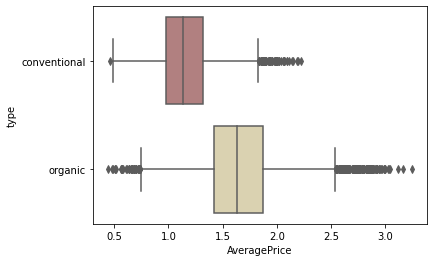

In [ ]:
sns.boxplot(y='type', x='AveragePrice', data= df, palette= 'pink')
# organic fruits price is more as compared to conventional type

<function matplotlib.pyplot.show>

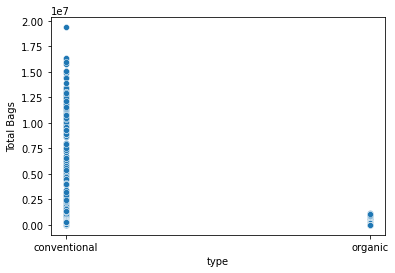

In [ ]:
sns.scatterplot(x='type',y='Total Bags',data=df)
plt.show

<function matplotlib.pyplot.show>

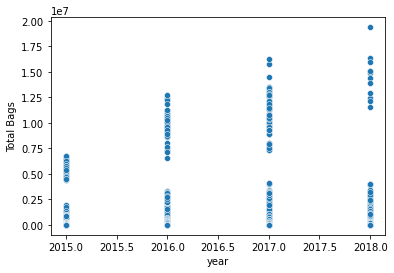

In [ ]:
sns.scatterplot(x='year',y='Total Bags',data=df)
plt.show

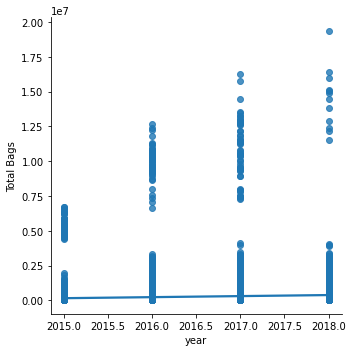

In [ ]:
sns.lmplot(x='year',y='Total Bags',data=df)

### watching bivarient analysis there is no strong relatinship between them we need to conclude and go with Multiverient analysis for finding stron co-relation

#Multivariate analysis


In [ ]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


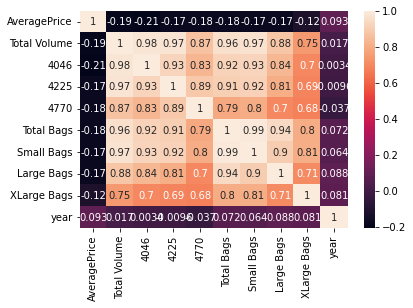

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
sns.pairplot(df,diag_kind='kde')
plt.show()

#Data preprocesseing

In [ ]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
index,,,,,,,,,,,,,
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['year']= lb.fit_transform(df['year'])

In [ ]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
index,,,,,,,,,,,,,
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,0,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,0,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,0,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,0,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,0,Albany


In [ ]:
# to shows all columns

pd.set_option('display.max_columns',2000)
pd.set_option('display.max_rows',500)

In [ ]:
df_updated= pd.get_dummies(df)
df_updated.head(3)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Date_2015-01-04,Date_2015-01-11,Date_2015-01-18,Date_2015-01-25,Date_2015-02-01,Date_2015-02-08,Date_2015-02-15,Date_2015-02-22,Date_2015-03-01,Date_2015-03-08,Date_2015-03-15,Date_2015-03-22,Date_2015-03-29,Date_2015-04-05,Date_2015-04-12,Date_2015-04-19,Date_2015-04-26,Date_2015-05-03,Date_2015-05-10,Date_2015-05-17,Date_2015-05-24,Date_2015-05-31,Date_2015-06-07,Date_2015-06-14,Date_2015-06-21,Date_2015-06-28,Date_2015-07-05,Date_2015-07-12,Date_2015-07-19,Date_2015-07-26,Date_2015-08-02,Date_2015-08-09,Date_2015-08-16,Date_2015-08-23,Date_2015-08-30,Date_2015-09-06,Date_2015-09-13,Date_2015-09-20,Date_2015-09-27,Date_2015-10-04,Date_2015-10-11,Date_2015-10-18,Date_2015-10-25,Date_2015-11-01,Date_2015-11-08,Date_2015-11-15,Date_2015-11-22,Date_2015-11-29,Date_2015-12-06,Date_2015-12-13,Date_2015-12-20,Date_2015-12-27,Date_2016-01-03,Date_2016-01-10,Date_2016-01-17,Date_2016-01-24,Date_2016-01-31,Date_2016-02-07,Date_2016-02-14,Date_2016-02-21,Date_2016-02-28,Date_2016-03-06,Date_2016-03-13,Date_2016-03-20,Date_2016-03-27,Date_2016-04-03,Date_2016-04-10,Date_2016-04-17,Date_2016-04-24,Date_2016-05-01,Date_2016-05-08,Date_2016-05-15,Date_2016-05-22,Date_2016-05-29,Date_2016-06-05,Date_2016-06-12,Date_2016-06-19,Date_2016-06-26,Date_2016-07-03,Date_2016-07-10,Date_2016-07-17,Date_2016-07-24,Date_2016-07-31,Date_2016-08-07,Date_2016-08-14,Date_2016-08-21,Date_2016-08-28,Date_2016-09-04,Date_2016-09-11,Date_2016-09-18,Date_2016-09-25,Date_2016-10-02,Date_2016-10-09,Date_2016-10-16,Date_2016-10-23,Date_2016-10-30,Date_2016-11-06,Date_2016-11-13,Date_2016-11-20,Date_2016-11-27,Date_2016-12-04,Date_2016-12-11,Date_2016-12-18,Date_2016-12-25,Date_2017-01-01,Date_2017-01-08,Date_2017-01-15,Date_2017-01-22,Date_2017-01-29,Date_2017-02-05,Date_2017-02-12,Date_2017-02-19,Date_2017-02-26,Date_2017-03-05,Date_2017-03-12,Date_2017-03-19,Date_2017-03-26,Date_2017-04-02,Date_2017-04-09,Date_2017-04-16,Date_2017-04-23,Date_2017-04-30,Date_2017-05-07,Date_2017-05-14,Date_2017-05-21,Date_2017-05-28,Date_2017-06-04,Date_2017-06-11,Date_2017-06-18,Date_2017-06-25,Date_2017-07-02,Date_2017-07-09,Date_2017-07-16,Date_2017-07-23,Date_2017-07-30,Date_2017-08-06,Date_2017-08-13,Date_2017-08-20,Date_2017-08-27,Date_2017-09-03,Date_2017-09-10,Date_2017-09-17,Date_2017-09-24,Date_2017-10-01,Date_2017-10-08,Date_2017-10-15,Date_2017-10-22,Date_2017-10-29,Date_2017-11-05,Date_2017-11-12,Date_2017-11-19,Date_2017-11-26,Date_2017-12-03,Date_2017-12-10,Date_2017-12-17,Date_2017-12-24,Date_2017-12-31,Date_2018-01-07,Date_2018-01-14,Date_2018-01-21,Date_2018-01-28,Date_2018-02-04,Date_2018-02-11,Date_2018-02-18,Date_2018-02-25,Date_2018-03-04,Date_2018-03-11,Date_2018-03-18,Date_2018-03-25,type_conventional,type_organic,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [ ]:
df_updated.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       ...
       'region_SouthCarolina', 'region_SouthCentral', 'region_Southeast',
       'region_Spokane', 'region_StLouis', 'region_Syracuse', 'region_Tampa',
       'region_TotalUS', 'region_West', 'region_WestTexNewMexico'],
      dtype='object', length=235)

###split the data set

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
y= df_updated['AveragePrice']
X= df_updated.drop(['AveragePrice'], axis=1)


In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size=0.2,random_state=99)

In [ ]:
print('training data set shape')
print('X_train=',X_train.shape)
print('y_train=',y_train.shape)
print('========================')
print('training data set shape')
print('X_test=',X_test.shape)
print('y_test=',y_test.shape)

training data set shape
X_train= (14599, 234)
y_train= (14599,)
training data set shape
X_test= (3650, 234)
y_test= (3650,)


# Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(X_train)
scaled_Xtrain= sc.transform(X_train)
scaled_Xtest= sc.transform(X_test)

In [ ]:
scaled_Xtrain

array([[ 0.51805144,  1.10175186,  0.20967487, ..., -0.13622985,
        -0.13778655, -0.13570727],
       [-0.24821814, -0.23265801, -0.24710833, ..., -0.13622985,
        -0.13778655, -0.13570727],
       [-0.12123999, -0.01823591, -0.21994122, ..., -0.13622985,
        -0.13778655, -0.13570727],
       ...,
       [-0.22557239, -0.23048004, -0.20159103, ..., -0.13622985,
        -0.13778655, -0.13570727],
       [-0.05522274, -0.17225975,  0.0988538 , ..., -0.13622985,
        -0.13778655, -0.13570727],
       [-0.2466187 , -0.23319047, -0.24807583, ..., -0.13622985,
        -0.13778655, -0.13570727]])

In [ ]:
from sklearn.linear_model import LinearRegression

model =LinearRegression()
model.fit(scaled_Xtrain,y_train)
pred= model.predict(scaled_Xtest)

In [ ]:
pred

array([1.28154167, 1.51530632, 1.36381706, ..., 0.71443351, 1.94738182,
       1.00774431])

In [ ]:
model.coef_


array([-1.51173965e+02,  5.59135912e+01,  5.23750430e+01,  4.71705020e+00,
       -1.55526854e+04,  1.18204774e+04,  3.84304247e+03,  2.81935607e+02,
        2.65444792e+10, -2.08536145e+10, -2.20665341e+10, -2.07283235e+10,
       -2.18294746e+10, -2.14688519e+10, -2.15897455e+10, -2.09781399e+10,
       -2.09781399e+10, -2.03477160e+10, -2.07283235e+10, -2.12249481e+10,
       -2.08536145e+10, -2.07283235e+10, -2.08536145e+10, -2.13472568e+10,
       -2.18294746e+10, -2.12249481e+10, -2.15897455e+10, -2.13472568e+10,
       -2.07283235e+10, -2.06022532e+10, -2.09781399e+10, -2.00898823e+10,
       -2.06022532e+10, -2.09781399e+10, -2.13472568e+10, -2.17099493e+10,
       -2.15897455e+10, -2.12249481e+10, -2.15897455e+10, -2.14688519e+10,
       -2.15897455e+10, -2.20665341e+10, -2.08536145e+10, -2.09781399e+10,
       -2.06022532e+10, -2.11019134e+10, -2.18294746e+10, -2.11019134e+10,
       -2.07283235e+10, -2.12249481e+10, -2.02192191e+10, -2.15897455e+10,
       -2.07283235e+10, -

In [ ]:
model.intercept_

1.4063413959576634

In [ ]:
model.score(scaled_Xtest,y_test)

0.6767084076565026